In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
grayImage = r'Albert_Einstein_Head.jpg'
colourTmage = r'colorful-flower.png'

In [3]:
I_gray = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colourTmage)

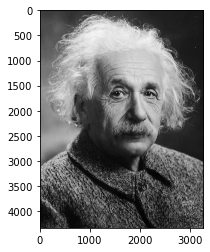

In [5]:
plt.imshow(I_gray, cmap='gray')

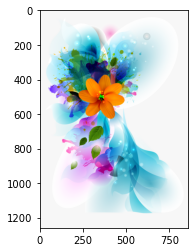

In [6]:
plt.imshow(I_BGR[:,:,::-1])

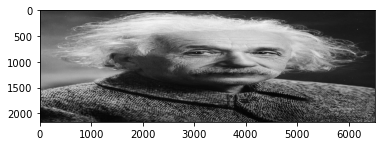

In [9]:
I_gray_resized = cv2.resize(src=I_gray, fx=2, fy=0.5, dsize=None)
plt.imshow(I_gray_resized, cmap='gray')

In [10]:
I_gray_resized.shape

(2166, 6500)

In [11]:
I_gray.shape

(4333, 3250)

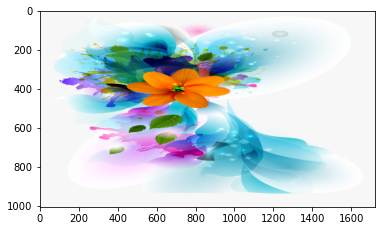

In [13]:
I_BGR_resized = cv2.resize(I_BGR[:,:,::-1], fx=2, fy=0.8, dsize=None)
plt.imshow(I_BGR_resized)

([], [])

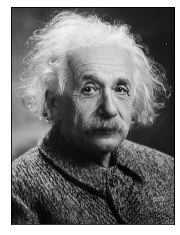

In [16]:
I_gray_zoom = cv2.resize(I_gray, fy=2, fx=2, dsize=None)
plt.imshow(I_gray_zoom, cmap='gray')
plt.xticks([])
plt.yticks([])

In [17]:
p = np.array([2,4])
sx,sy = 2,2 
s = np.array([[sx,0], [0,sy]])
s

array([[2, 0],
       [0, 2]])

In [18]:
p_dash = s.dot(p)
p_dash

array([4, 8])

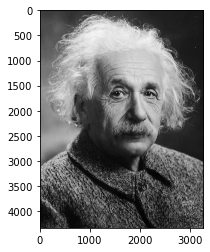

In [19]:
plt.imshow(I_gray, cmap='gray')

In [20]:
I_gray.shape

(4333, 3250)

In [21]:
numRows = I_gray.shape[0]
numCols = I_gray.shape[1]
print(numRows, numCols)

4333 3250


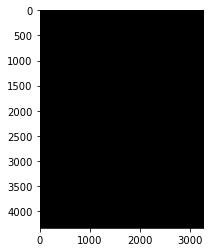

In [25]:
I_gray2 = np.zeros((numRows,numCols), dtype='uint8')
plt.imshow(I_gray2, cmap='gray')

In [26]:
for i in range(numRows):
    for j in range(numCols):
        I_gray2[i,j]=I_gray[i,j]

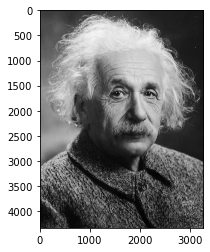

In [27]:
plt.imshow(I_gray2, cmap='gray')

In [28]:
for i in range(numRows):
    for j in range(numCols):
        I_gray2[numRows-i-1,j]=I_gray[i,j]

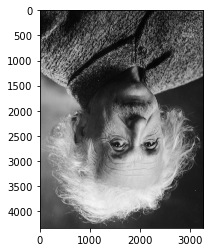

In [29]:
plt.imshow(I_gray2, cmap='gray')

In [30]:
for i in range(numRows):
    for j in range(numCols):
        I_gray2[i,numCols-j-1]=I_gray[i,j]

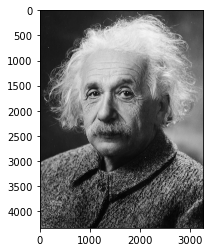

In [31]:
plt.imshow(I_gray2, cmap='gray')

In [32]:
for i in range(numRows):
    for j in range(numCols):
        I_gray2[numRows-i-1,numCols-j-1]=I_gray[i,j]

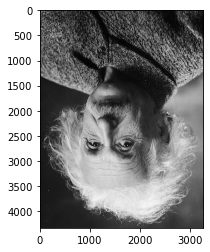

In [33]:
plt.imshow(I_gray2, cmap='gray')

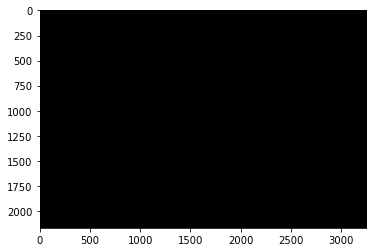

In [37]:
row_crop = int(numRows/2.0)
I_gray3 = np.zeros((row_crop,numCols), dtype='uint8')
plt.imshow(I_gray3, cmap='gray')

In [38]:
for i in range(row_crop):
    for j in range(numCols):
        I_gray3[i,j] = I_gray[i,j]

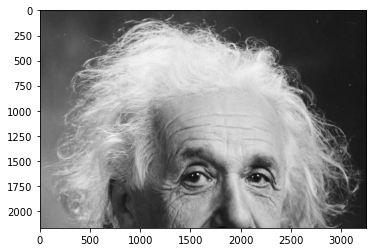

In [39]:
plt.imshow(I_gray3, cmap='gray')

In [40]:
def f_bilibearInterpolate(r,c,I):
    if r>=0 and r<I.shape[0] and c>=0 and c<I.shape[0]:
        lc=int(c)
        rc = lc + 1
        wr= c - lc
        wl = rc - c
        tr =int(r)
        br = tr + 1
        wt =br - r
        wb = r - tr
        a = wl*I[tr,lc] + wr*I[tr,rc]
        b = wl*I[br,lc] + wr*I[br,rc]
        g = wt*a + wb*b
        return int(g)